<a href="https://colab.research.google.com/github/EduardaSantosDiniz/Criminalidade_no_Brasil/blob/main/padroes_criminalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1️⃣ Definição do Problema

# **O brasil diminui seus crimes com o passar do tempo?**


---


* Top 3 crimes que mais acontecem em cada uf
* Top 3 crimes que mais aconteceram divido por ano
* Número de cada crime em cada estado de 2017 e dps de 2022
* Quais crimes mais cresceram ou diminuíram?
* Comparação entre estados do Norte, Nordeste, Sul, Sudeste e Centro-Oeste.
* Média de crimes por estado ao longo dos anos.

# 2️⃣Coleta de Dados

In [ ]:
import pandas as pd

df = pd.read_excel('ind_uf.xlsx')
print(df.head())

     UF                       Tipo Crime   Ano      Mês  Ocorrências
0  Acre                          Estupro  2022  janeiro           31
1  Acre                 Furto de veículo  2022  janeiro           50
2  Acre                 Homicídio doloso  2022  janeiro           10
3  Acre  Lesão corporal seguida de morte  2022  janeiro            1
4  Acre   Roubo a instituição financeira  2022  janeiro            0


# 3️⃣ Limpeza e Preparação dos Dados

A etapa de limpeza e preparação dos dados eu considero um dos mais importantes antes de começar a interpretá-los, porém nessa base de dados, todas as informações estão dentro do padrão necessário.

# 4️⃣ Análise Exploratória de Dados (EDA - Exploratory Data Analysis)

# Média de crimes por estado ao longo dos anos.

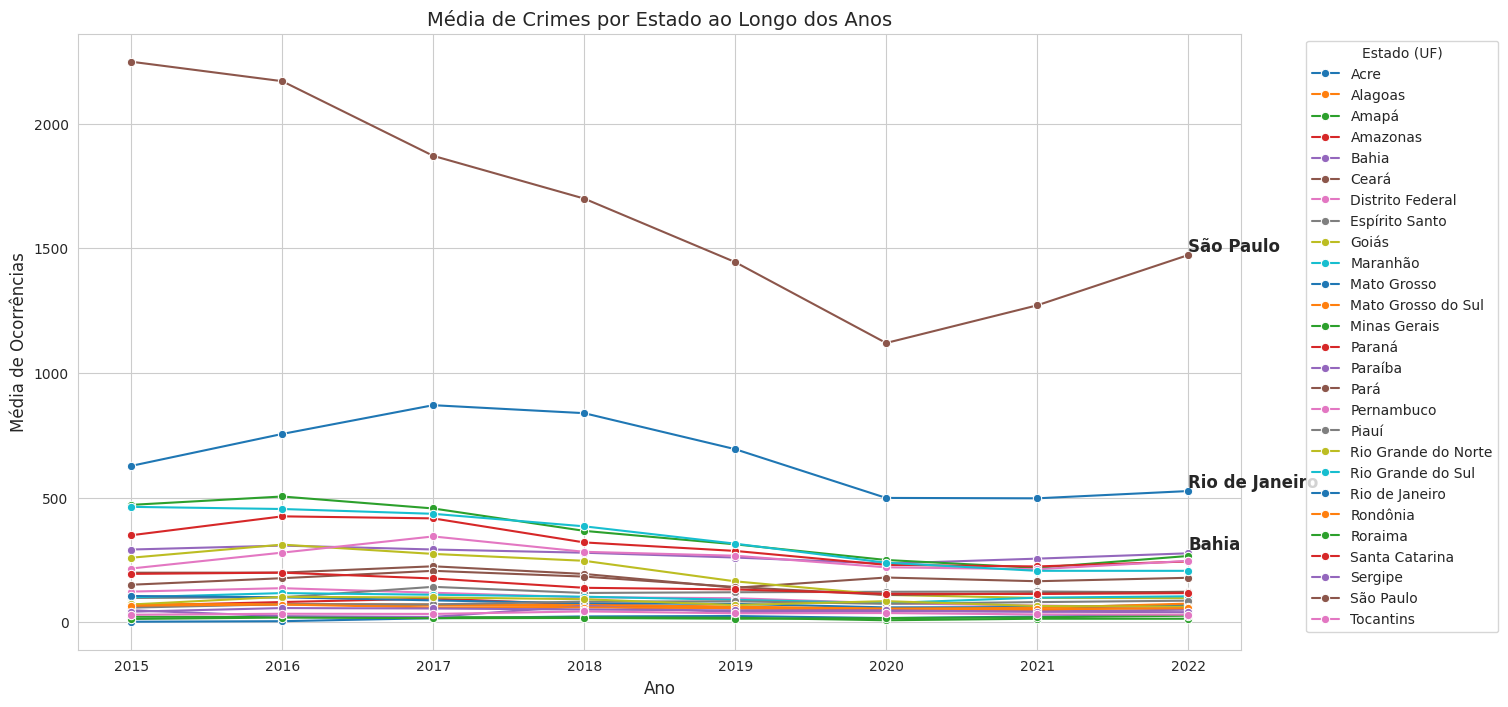

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

media_crimes_estado = df.groupby(["UF", "Ano"])["Ocorrências"].mean().reset_index()

plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")
sns.lineplot(data=media_crimes_estado, x="Ano", y="Ocorrências", hue="UF", marker="o", palette="tab10")

ultimo_ano = media_crimes_estado["Ano"].max()
top3_estados = media_crimes_estado[media_crimes_estado["Ano"] == ultimo_ano].nlargest(3, "Ocorrências")

for _, row in top3_estados.iterrows():
    plt.text(row["Ano"], row["Ocorrências"], row["UF"], fontsize=12, weight="bold", ha="left", va="bottom")

plt.title("Média de Crimes por Estado ao Longo dos Anos", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Média de Ocorrências", fontsize=12)
plt.legend(title="Estado (UF)", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()


# Quais crimes mais cresceram ou diminuíram?

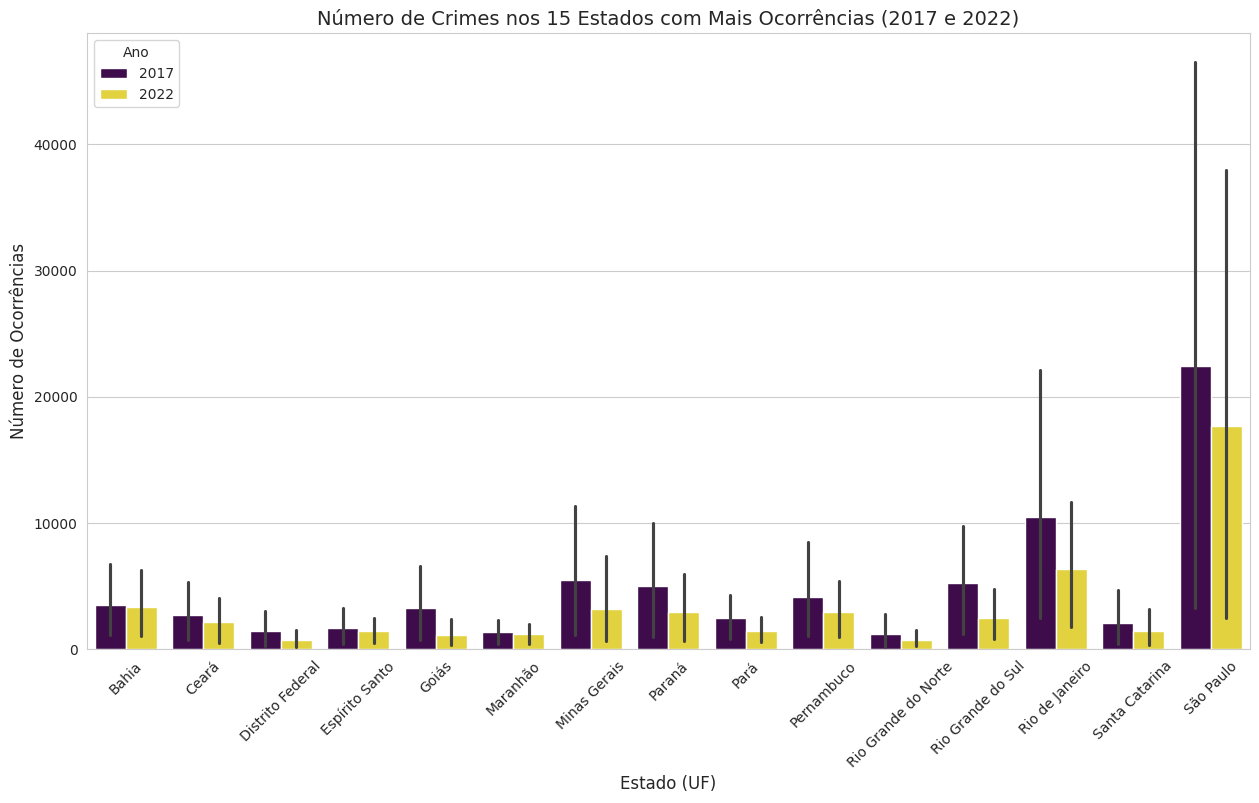

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_filtrado = df[df["Ano"].isin([2017, 2022])]


crimes_por_estado = df_filtrado.groupby(["UF", "Ano", "Tipo Crime"])["Ocorrências"].sum().reset_index()

top_estados = crimes_por_estado.groupby("UF")["Ocorrências"].sum().nlargest(15).index
crimes_top15 = crimes_por_estado[crimes_por_estado["UF"].isin(top_estados)]

plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")
sns.barplot(data=crimes_top15, x="UF", y="Ocorrências", hue="Ano", palette="viridis")

plt.title("Número de Crimes nos 15 Estados com Mais Ocorrências (2017 e 2022)", fontsize=14)
plt.xlabel("Estado (UF)", fontsize=12)
plt.ylabel("Número de Ocorrências", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Ano")

plt.show()

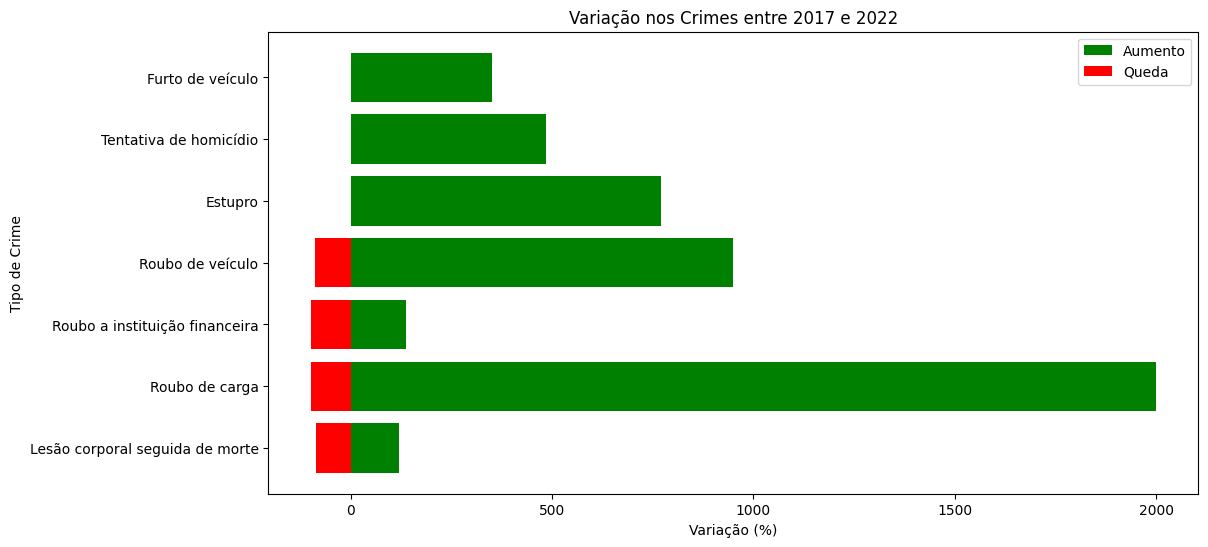

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df_filtrado = df[df["Ano"].isin([2017, 2022])]

crimes_por_estado = df_filtrado.groupby(["UF", "Ano", "Tipo Crime"])["Ocorrências"].sum().reset_index()

crimes_2017 = crimes_por_estado[crimes_por_estado["Ano"] == 2017]
crimes_2022 = crimes_por_estado[crimes_por_estado["Ano"] == 2022]

comparacao = crimes_2017.merge(crimes_2022, on=["UF", "Tipo Crime"], suffixes=("_2017", "_2022"))

comparacao["Variação (%)"] = ((comparacao["Ocorrências_2022"] - comparacao["Ocorrências_2017"]) / comparacao["Ocorrências_2017"]) * 100

comparacao_ordenada = comparacao.sort_values(by="Variação (%)", ascending=False)

top_aumento = comparacao_ordenada.head(20)
top_queda = comparacao_ordenada.tail(20)

plt.figure(figsize=(12, 6))
plt.barh(top_aumento["Tipo Crime"], top_aumento["Variação (%)"], color='green', label="Aumento")
plt.barh(top_queda["Tipo Crime"], top_queda["Variação (%)"], color='red', label="Queda")
plt.xlabel("Variação (%)")
plt.ylabel("Tipo de Crime")
plt.title("Variação nos Crimes entre 2017 e 2022")
plt.legend()
plt.show()


# Comparação entre estados do Norte, Nordeste, Sul, Sudeste e Centro-Oeste.

Estados não reconhecidos: []


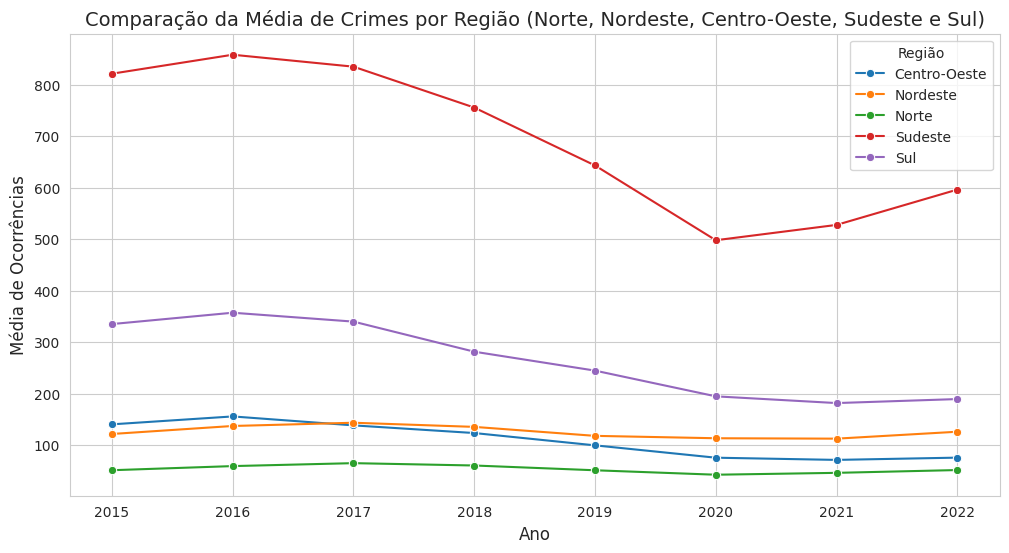

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

regioes = {
    "Norte": ["AC", "AP", "AM", "PA", "RO", "RR", "TO"],
    "Nordeste": ["AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE"],
    "Centro-Oeste": ["DF", "GO", "MT", "MS"],
    "Sudeste": ["ES", "MG", "RJ", "SP"],
    "Sul": ["PR", "RS", "SC"]
}

mapeamento_estados = {
    "Acre": "AC", "Amapá": "AP", "Amazonas": "AM", "Pará": "PA", "Rondônia": "RO", "Roraima": "RR", "Tocantins": "TO",
    "Alagoas": "AL", "Bahia": "BA", "Ceará": "CE", "Maranhão": "MA", "Paraíba": "PB", "Pernambuco": "PE", "Piauí": "PI", "Rio Grande do Norte": "RN", "Sergipe": "SE",
    "Distrito Federal": "DF", "Goiás": "GO", "Mato Grosso": "MT", "Mato Grosso do Sul": "MS",
    "Espírito Santo": "ES", "Minas Gerais": "MG", "Rio de Janeiro": "RJ", "São Paulo": "SP",
    "Paraná": "PR", "Rio Grande do Sul": "RS", "Santa Catarina": "SC"
}

df["UF"] = df["UF"].replace(mapeamento_estados)

df["Região"] = df["UF"].map(lambda x: next((regiao for regiao, estados in regioes.items() if x in estados), "Desconhecido"))

print("Estados não reconhecidos:", df[df["Região"] == "Desconhecido"]["UF"].unique())

media_crimes_regiao = df.groupby(["Região", "Ano"])["Ocorrências"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.lineplot(data=media_crimes_regiao, x="Ano", y="Ocorrências", hue="Região", marker="o", palette="tab10")

plt.title("Comparação da Média de Crimes por Região (Norte, Nordeste, Centro-Oeste, Sudeste e Sul)", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Média de Ocorrências", fontsize=12)
plt.legend(title="Região")

plt.show()


# Top 3 crimes que mais aconteceram divido por ano





<ipython-input-32-ec5b2d608254>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top3_crimes_por_ano = crimes_agrupados.groupby("Ano").apply(lambda x: x.nlargest(3, "Ocorrências"))


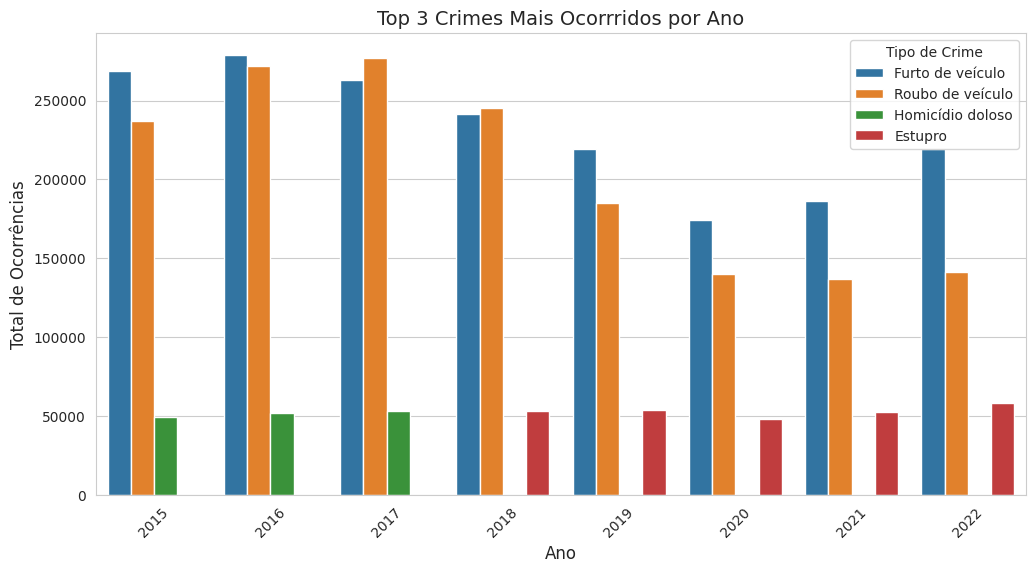

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

crimes_agrupados = df.groupby(["Ano", "Tipo Crime"])["Ocorrências"].sum().reset_index()

top3_crimes_por_ano = crimes_agrupados.groupby("Ano").apply(lambda x: x.nlargest(3, "Ocorrências"))

top3_crimes_por_ano.reset_index(drop=True, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=top3_crimes_por_ano, x="Ano", y="Ocorrências", hue="Tipo Crime")

plt.title("Top 3 Crimes Mais Ocorrridos por Ano", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Total de Ocorrências", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Tipo de Crime")

plt.show()

# Top 3 crimes que mais acontecem em cada uf

<ipython-input-44-04800e445169>:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_crimes_por_uf = crime_counts.groupby("UF").apply(lambda x: x.nlargest(3, "Ocorrências")).reset_index(drop=True)


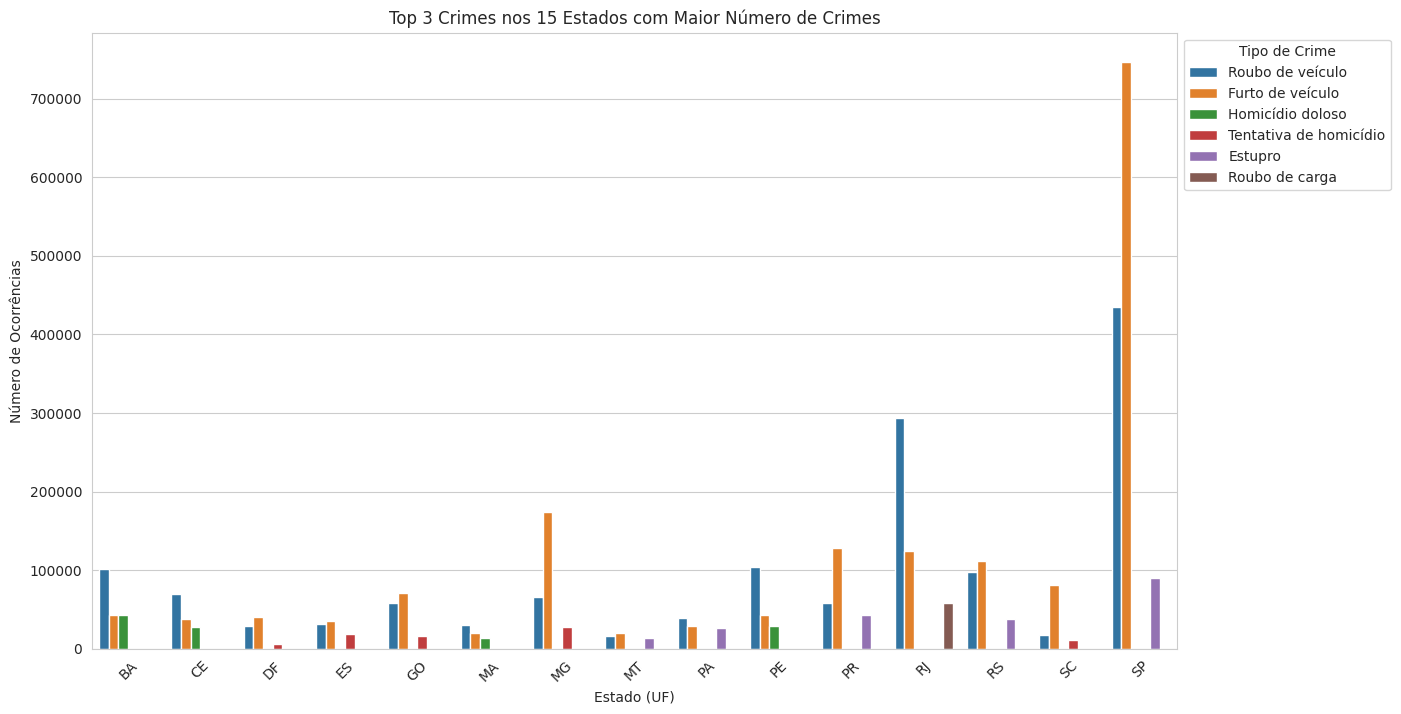

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

total_crimes_por_uf = df.groupby("UF")["Ocorrências"].sum().reset_index()

top_15_ufs = total_crimes_por_uf.nlargest(15, "Ocorrências")["UF"]

df_top_15 = df[df["UF"].isin(top_15_ufs)]

crime_counts = df_top_15.groupby(["UF", "Tipo Crime"])["Ocorrências"].sum().reset_index()

top_crimes_por_uf = crime_counts.groupby("UF").apply(lambda x: x.nlargest(3, "Ocorrências")).reset_index(drop=True)

plt.figure(figsize=(14, 8))
sns.barplot(data=top_crimes_por_uf, x="UF", y="Ocorrências", hue="Tipo Crime", dodge=True)

plt.xticks(rotation=45)
plt.xlabel("Estado (UF)")
plt.ylabel("Número de Ocorrências")
plt.title("Top 3 Crimes nos 15 Estados com Maior Número de Crimes")
plt.legend(title="Tipo de Crime", bbox_to_anchor=(1, 1))
plt.show()


# O brasil diminui seus crimes com o passar do tempo?

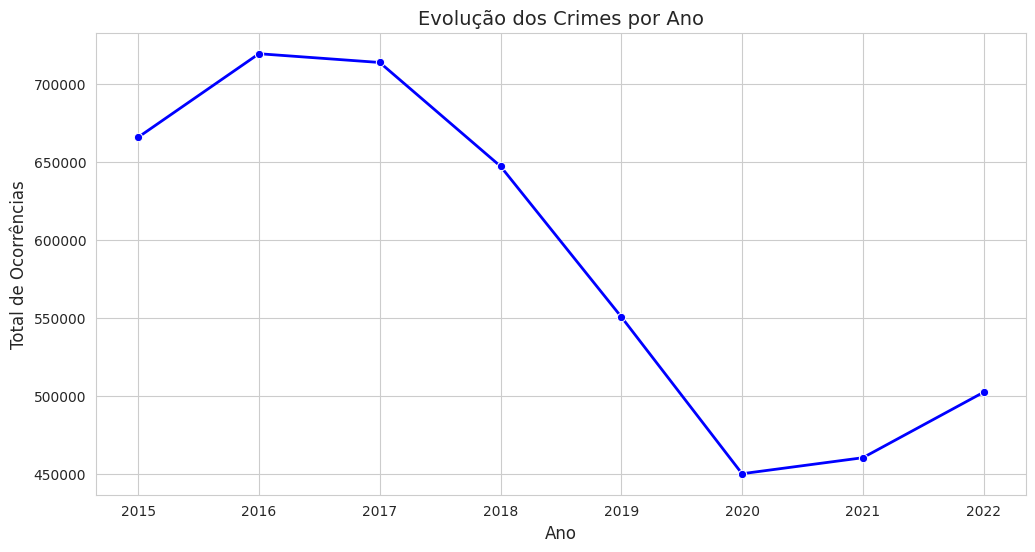

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

evolucao_crimes = df.groupby("Ano")["Ocorrências"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.lineplot(data=evolucao_crimes, x="Ano", y="Ocorrências", marker="o", color="b", linewidth=2)

plt.title("Evolução dos Crimes por Ano", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Total de Ocorrências", fontsize=12)

plt.show()

# 5️⃣ Resolução do Problema
**Sobre a pegunta principal:**

O objetivo principal desta análise é determinar se, ao longo do tempo, os índices de criminalidade no Brasil apresentaram redução. Os resultados indicam que, de fato, houve uma queda significativa nos crimes. No entanto, ao observar o gráfico e considerar o contexto histórico, torna-se evidente que essa redução não está diretamente relacionada a um aumento da segurança pública ou a políticas eficazes de combate à criminalidade. Em vez disso, é provável que a diminuição tenha ocorrido devido às restrições de mobilidade impostas durante a pandemia de COVID-19, que limitaram a circulação de pessoas e, consequentemente, a ocorrência de delitos.

**Outros insights:**

Ao comparar os índices de criminalidade entre os estados, é fundamental considerar que alguns deles podem apresentar números absolutos mais elevados não necessariamente por serem mais violentos, mas sim devido à sua maior população. Um exemplo claro é o estado de São Paulo, que, por ser o mais populoso do Brasil, tende a registrar um número absoluto de crimes mais alto. No entanto, isso não significa, por definição, que seja o estado mais perigoso. Além disso, essa relação não é uma regra fixa, como demonstrado pelo caso de Minas Gerais, o segundo estado mais populoso do país, que não figura entre os estados com os maiores índices de criminalidade proporcionalmente.

# Percebeu o quanto é importante usar os dados para tomar decisões?
Se gostou desse projeto que fiz, e gostaria de tirar uma dúvida ou algum conselho/feedback. Me mande mensagem em uma das minhas redes:

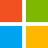 eduardafaculdade0306@gmail.com


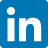 https://www.linkedin.com/in/eduarda-diniz-24a275272/


    